---
Analysis  of  Yahoo  Finance's  Environment,  Social,  and  Governance  Risk Ratings<br>
Emily Peters<br>
## Introduction<br>
This analysis will focus on the impact that corporations have on our society beyond the economy. Impacts like these are often overlooked when people are looking to invets money into the stock market. It is especially important to take these impacts into account due to our urgent need for climate change mitigation.  
---

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()


In [ ]:
esg=pd.read_csv('https://github.com/petersemily/petersemily.github.io/raw/main/posts/danl-210-esg-proj.csv')
esg

,Symbol,Company Name,Sector,Industry,Country,Market Cap,ESG Risk,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Rating
0,A,"Agilent Technologies, Inc.",Industrials,Diagnostics & Research,United States,4.036543e+10,13.6,1.1,6.4,6.1,2.0
1,AA,Alcoa Corporation,Industrials,Aluminum,United States,6.622136e+09,24.0,13.8,5.9,4.3,3.0
2,AAL,American Airlines Group Inc.,Consumer Discretionary,Airlines,United States,9.088025e+09,26.4,9.9,11.6,4.8,2.0
3,AAP,"Advance Auto Parts, Inc.",Consumer Discretionary,Specialty Retail,United States,4.474665e+09,11.5,0.1,8.3,3.1,2.0
4,AAPL,Apple Inc,Technology,Consumer Electronics,United States,2.614310e+12,17.2,0.5,7.4,9.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...
631,XYL,Xylem Inc.,Industrials,Specialty Industrial Machinery,United States,3.201040e+10,18.1,4.3,8.7,5.2,1.0
632,YUM,"Yum! Brands, Inc.",Consumer Discretionary,Restaurants,United States,3.988504e+10,20.1,4.5,11.4,4.1,2.0
633,Z,"Zillow Group, Inc.",Consumer Discretionary,Internet Content & Information,United States,1.019547e+10,22.2,1.2,11.5,9.5,2.0
634,ZBH,"Zimmer Biomet Holdings, Inc.",Health Care,Medical Devices,United States,2.447678e+10,26.0,3.6,14.5,7.9,2.0


## I.  Descriptive  Statistics

### An overview of each rating



In [ ]:
esg_stats=(esg[['ESG Risk','Environment Risk Score','Social Risk Score','Governance Risk Score','Controversy Rating']].describe())
esg_stats

,ESG Risk,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Rating
count,634.000000,611.000000,611.000000,611.000000,576.000000
mean,21.640694,5.828642,9.012439,6.822259,1.967014
std,7.118419,5.317609,3.568332,2.394700,0.787261
min,6.400000,0.000000,0.800000,2.400000,1.000000
25%,16.300000,1.800000,6.700000,5.200000,1.000000
50%,21.200000,4.000000,8.900000,6.300000,2.000000
75%,26.100000,9.000000,11.100000,7.900000,2.000000
max,52.000000,27.300000,22.500000,19.400000,5.000000


ESG Risk Distribution:

<Axes: xlabel='ESG Risk', ylabel='Count'>

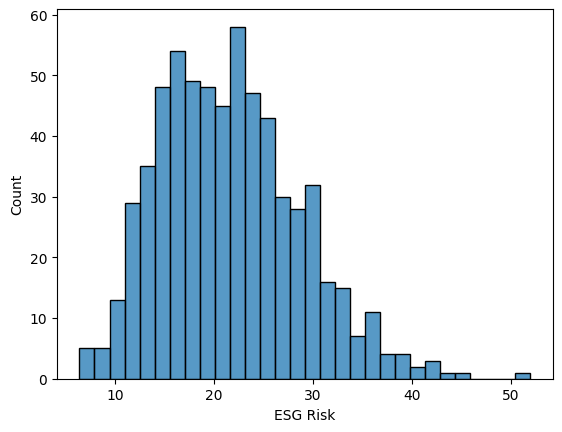

In [ ]:
sns.histplot(data=esg,
             x='ESG Risk',
             bins=30)

Most companies fall within the 5 to 35 range. This ESG Risk distribution is slightly skewed right. ESG Risk could be between 0 and 100, so these companies have a low to moderate rating.

Environment Risk Score Distribution:

<Axes: xlabel='Environment Risk Score', ylabel='Count'>

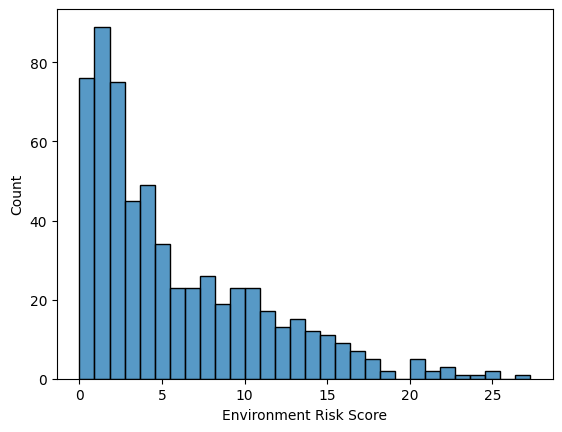

In [ ]:
sns.histplot(data=esg,
             x='Environment Risk Score',
             bins=30)

Environment Risk Scores remain very low for the most part, with the highest frequency between 0 and 5. The distribution is heavily skewed right.

Social Risk Score Distribution:

<Axes: xlabel='Social Risk Score', ylabel='Count'>

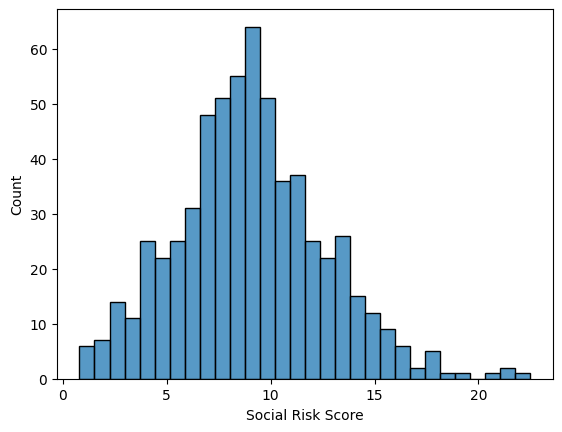

In [ ]:
sns.histplot(data=esg,
             x='Social Risk Score',
             bins=30)

The Social Risk Score is much more evenly distributed, and there is a larger range of scores.

Governance Risk Score Distribution:

<Axes: xlabel='Governance Risk Score', ylabel='Count'>

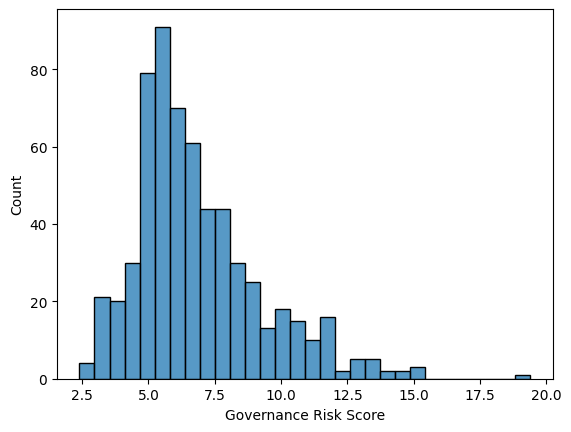

In [ ]:
sns.histplot(data=esg,
             x='Governance Risk Score',
             bins=30)

The Governance Risk Score distribution is skewed right. A mojority of the values fall between 2.5 and 15.

Controversy Rating Distribution:

<Axes: xlabel='Controversy Rating', ylabel='Count'>

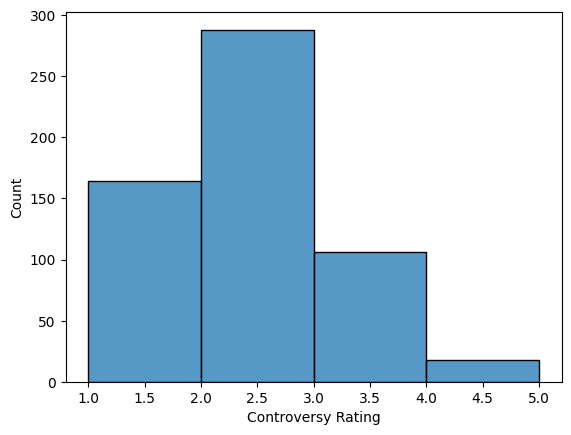

In [ ]:
sns.histplot(data=esg,
             x='Controversy Rating',
             bins=4)

Most companies have a low to moderate Controversy Rating.

### Statistics  by  Industry  and  Sector

There are so many different industries, and they all affect ESG issues differently. Let's take a look at ratings for each industry.

In [ ]:
esg_risk_industry=(
    esg
    .groupby('Industry')
    .agg(
        ESG_Risk_mean=('ESG Risk','mean')
    )
    .sort_values(by='ESG_Risk_mean',ascending=False)
    .head(20)
)
esg_risk_industry

,ESG_Risk_mean
Industry,
Oil & Gas Integrated,37.380000
Oil & Gas Exploration & Production,37.292308
Aerospace & Defense,34.687500
Conglomerates,33.833333
Farm Products,33.533333
Building Materials,33.300000
Oil & Gas Refining & Marketing,32.833333
Utilities - Independent Power Producers,32.000000
Agricultural Inputs,31.716667


Here are the top 20 industries with the highest average ESG Risk rating. All of these industries are nutorious for creating pollution and waste, which is why the scores are so high.

Correlation of Variables

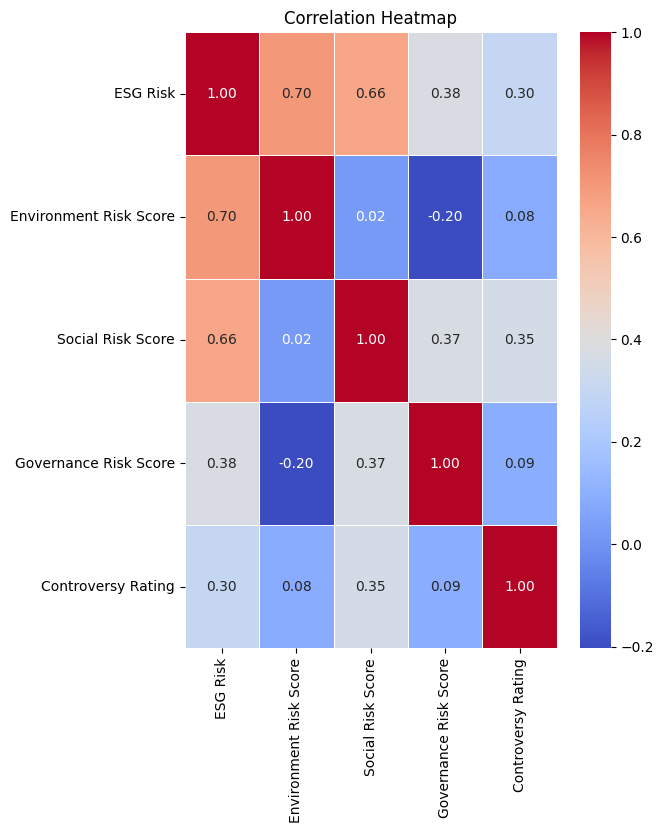

In [ ]:
corr=esg[['ESG Risk','Environment Risk Score','Social Risk Score','Governance Risk Score','Controversy Rating']].corr()
plt.figure(figsize=(6,8))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ESG Risk has the strongest correlation with other variables. This is because each rating is used to calculate the ESG Risk.

## II.  Exploratory  Data  Analysis<br>
###Is there a relationship between Country and ESG Risk?<br>
  Which countries other than the United States have the highest ESG Risk rating?

In [ ]:
#find top 5 countries to compare
country=(
    esg
    .groupby('Country')
    .agg(
        count=('Country','count')
    )
    .sort_values(by='count',ascending=False)
    .head(5)
)
country

,count
Country,
United States,551
Canada,37
Switzerland,8
Bermuda,6
Ireland,5


In [ ]:
top5=['United States','Canada','Switzerland','Bermuda','Ireland']
countries=esg[esg['Country'].isin(top5)]

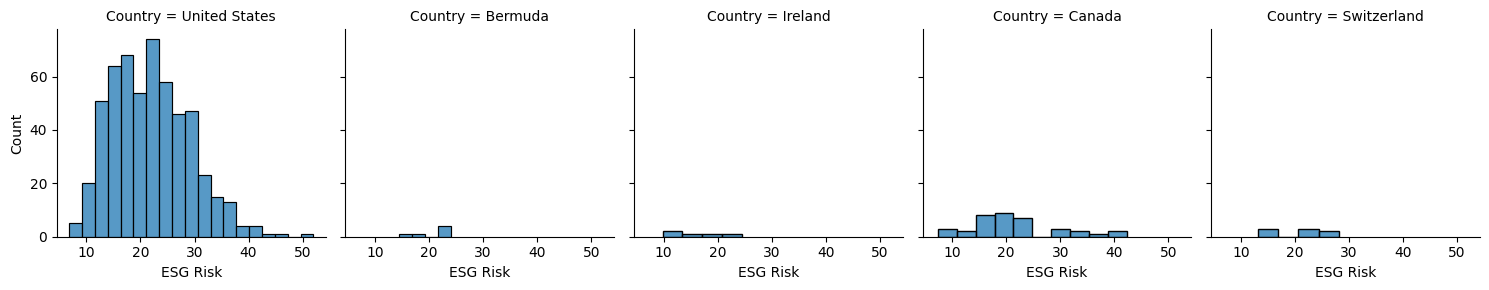

In [ ]:
(
    sns.FacetGrid(
        data=countries,
        col='Country'
    )
    .map(sns.histplot, 'ESG Risk')

)


Each counntry has a range of ESG Risk values, so the values depend on the type of company and industry. The United States has much higher ratings, but that is because there are so many more companies in that country.

## Significance<br>
Providing ESG ratings will help investors make informed, conscious decisions about where they are putting their money. It allows investors to put money into companies based on their own moral standards and beliefs.

##References<br>
https://finance.yahoo.com/news/guide-understanding-esg-ratings-151501443.html<br>
Chat GPT & Colab AI for fixing small errors